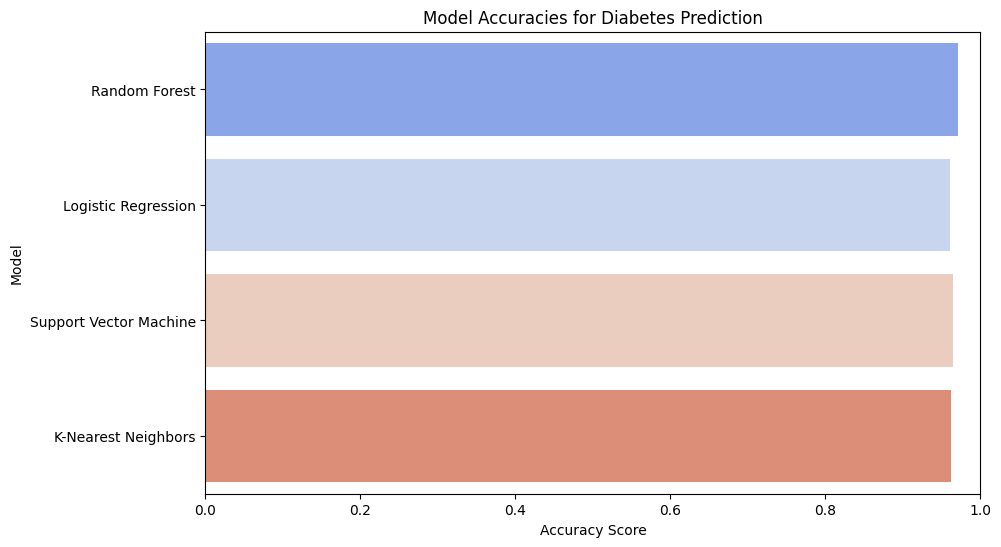

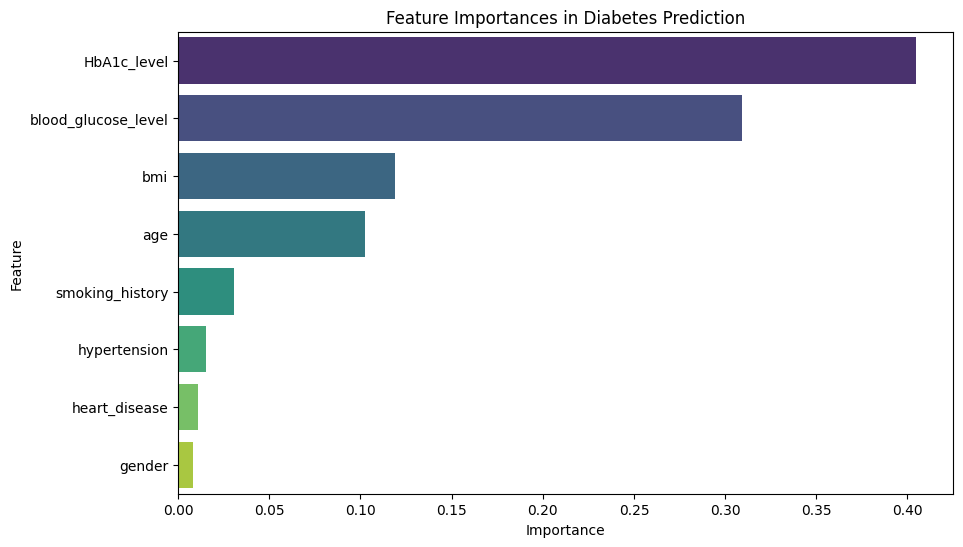

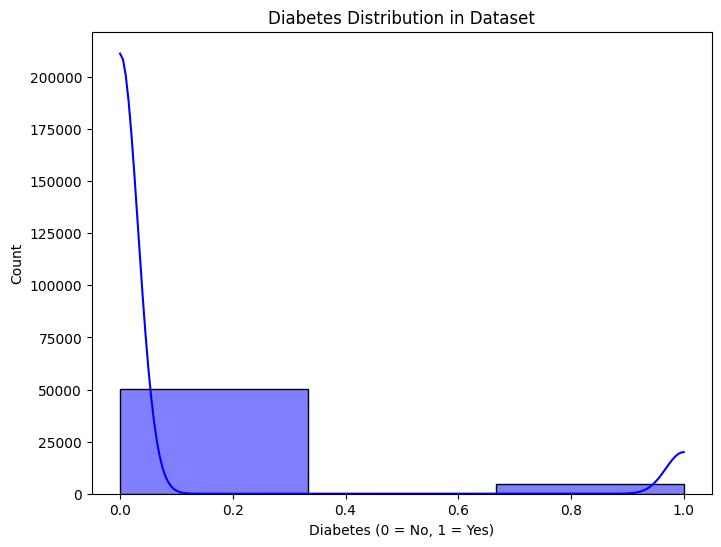

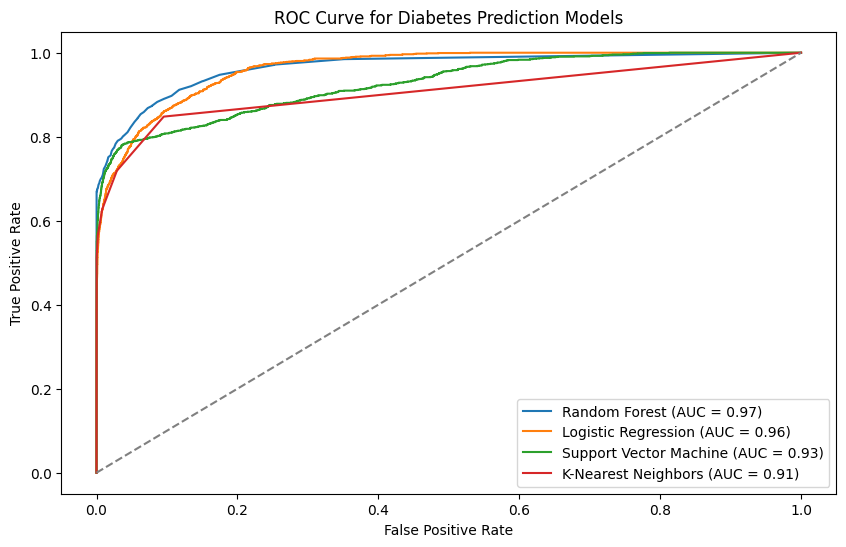

                    Model  Accuracy
0           Random Forest  0.971358
1     Logistic Regression  0.961124
2  Support Vector Machine  0.964878
3     K-Nearest Neighbors  0.961548


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Handle Missing Values
df.dropna(inplace=True)  # Drop missing values

# Encode categorical variables
enc = OrdinalEncoder()
df["smoking_history"] = enc.fit_transform(df[["smoking_history"]])
df["gender"] = enc.fit_transform(df[["gender"]])

# Define Independent and Dependent Variables
x = df.drop("diabetes", axis=1)
y = df["diabetes"]

# Feature Scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train models and store accuracy
accuracies = {}
y_pred_probs = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_probs[model_name] = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracies[model_name] = metrics.accuracy_score(y_test, y_pred)

# Convert to DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plot Model Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, hue='Model', dodge=False, legend=False, palette='coolwarm')
plt.title('Model Accuracies for Diabetes Prediction')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Train Random Forest to get feature importances
rf_model = RandomForestClassifier().fit(x_train, y_train)
importances = rf_model.feature_importances_
feature_names = df.drop("diabetes", axis=1).columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', dodge=False, legend=False, palette='viridis')
plt.title('Feature Importances in Diabetes Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot Histogram of Diabetes Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["diabetes"], bins=3, kde=True, color='blue')
plt.title("Diabetes Distribution in Dataset")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(10, 6))
for model_name, y_prob in y_pred_probs.items():
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction Models')
plt.legend()
plt.show()

# Display Accuracy DataFrame
print(accuracy_df)